In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV in pandas
data = ("/Users/chac/Desktop/Class/Project_4/amazon_product_reviews_ML/Resources/cleaned_data.csv")
df = pd.read_csv(data)

# Display DataFrame
df.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery
0,0,B0D12T4WZT,USB C Charger for iPhone 14 13 12 11 Charger [...,9,USD,5.0,59,1,$9.99,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
1,1,B0D2X7Y7VF,USB C to Lightning Cable [Apple MFi Certified]...,7,USD,4.5,318,1,$7.49,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
2,2,B0CZPHPJLN,Beats Solo 4 - Wireless Bluetooth On-Ear Headp...,149,USD,4.1,92,1,$149.95,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 Or fastest delivery ..."
3,3,B0D49CWPH2,"USB C to USB C Cable, (5Pack 6FT), New Nylon U...",29,USD,4.9,94,1,$29.66,False,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
4,4,B0D14HHDGJ,iPhone 15 Charger 5Pack (6/6/6/6/6 ft) USB C t...,15,USD,4.8,80,1,$15.99,False,False,True,False,500+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."


In [3]:
# Determine column names
df.columns

Index(['Unnamed: 0', 'asin', 'product_title', 'product_price', 'currency',
       'product_star_rating', 'product_num_ratings', 'product_num_offers',
       'product_minimum_offer_price', 'is_best_seller', 'is_amazon_choice',
       'is_prime', 'climate_pledge_friendly', 'sales_volume', 'delivery'],
      dtype='object')

Now that we have a clearer view of the DataFrame columns, we can make informed decisions about which columns will be utilized for the remainder of the code.

In [4]:
# Define a function to convert text to numeric
def text_to_numeric(text):
    if "K" in text:
        return int(float(text.replace("K", "").replace("+ bought in past month", "")) * 1000)
    else:
        return int(text.replace("+ bought in past month", ""))

# Convert sales_volume column to numeric
df["sales_volume_numeric"] = df["sales_volume"].apply(text_to_numeric)

# Display results
df.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,sales_volume_numeric
0,0,B0D12T4WZT,USB C Charger for iPhone 14 13 12 11 Charger [...,9,USD,5.0,59,1,$9.99,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",4000
1,1,B0D2X7Y7VF,USB C to Lightning Cable [Apple MFi Certified]...,7,USD,4.5,318,1,$7.49,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",4000
2,2,B0CZPHPJLN,Beats Solo 4 - Wireless Bluetooth On-Ear Headp...,149,USD,4.1,92,1,$149.95,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 Or fastest delivery ...",4000
3,3,B0D49CWPH2,"USB C to USB C Cable, (5Pack 6FT), New Nylon U...",29,USD,4.9,94,1,$29.66,False,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",10000
4,4,B0D14HHDGJ,iPhone 15 Charger 5Pack (6/6/6/6/6 ft) USB C t...,15,USD,4.8,80,1,$15.99,False,False,True,False,500+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",500


The text_to_numeric function converts text to numeric values, handling "K" (thousands) and removing extra text. This function is applied to the sales_volume column, creating a new sales_volume_numeric column.

In [5]:
# Check to see column was created successfully vs the original 
print(df[["sales_volume", "sales_volume_numeric"]])

                  sales_volume  sales_volume_numeric
0     4K+ bought in past month                  4000
1     4K+ bought in past month                  4000
2     4K+ bought in past month                  4000
3    10K+ bought in past month                 10000
4    500+ bought in past month                   500
..                         ...                   ...
360                          0                     0
361  300+ bought in past month                   300
362                          0                     0
363                          0                     0
364                          0                     0

[365 rows x 2 columns]


Through a side-by-side comparison, we have verified that the functions operated correctly, producing accurate numbers and usable data for the subsequent code.

In [6]:
# Sort the DataFrame by sales_volume_numeric column
df_sorted = df.sort_values(by="sales_volume_numeric", ascending=False)

# Display the sorted DataFrame
df_sorted.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,sales_volume_numeric
10,10,B099VMT8VZ,Meta Quest 2 — Advanced All-In-One Virtual Rea...,199,USD,4.7,73340,1,$199.00,True,False,False,False,20K+ bought in past month,FREE delivery Jun 18 - 24 Or fastest delivery ...,20000
26,26,B0CN6GHGD6,iPhone Charger Fast Charging【MFi Certified】 2P...,8,USD,4.6,1585,1,$8.95,False,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",10000
292,292,B08HV3MPFD,"Phomemo D30 Label Maker Machine, Portable Blue...",19,USD,4.3,18341,1,$19.99,True,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",10000
63,63,B098VYV9WP,SUPRUS Electric Lighter Arc Windproof Flameles...,7,USD,4.5,2661,1,$7.99,True,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",10000
298,298,B08HV3MPFD,"Phomemo D30 Label Maker Machine, Portable Blue...",19,USD,4.3,18341,1,$19.99,True,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",10000



Sorting the dataframe by sales volume in descending order will facilitate a clearer analysis of the products' performance, highlighting both the highest and lowest ends of the spectrum.

In [7]:
# Create a new column 'total_revenue' by multiplying 'product_price' with 'sales_volume_numeric'
df_sorted["total_revenue"] = df_sorted["product_price"] * df_sorted["sales_volume_numeric"]

# Display the updated DataFrame
df_sorted[["product_title", "product_price", "sales_volume_numeric", "total_revenue", "is_best_seller"]].head()

,product_title,product_price,sales_volume_numeric,total_revenue,is_best_seller
10,Meta Quest 2 — Advanced All-In-One Virtual Rea...,199,20000,3980000,True
26,iPhone Charger Fast Charging【MFi Certified】 2P...,8,10000,80000,False
292,"Phomemo D30 Label Maker Machine, Portable Blue...",19,10000,190000,True
63,SUPRUS Electric Lighter Arc Windproof Flameles...,7,10000,70000,True
298,"Phomemo D30 Label Maker Machine, Portable Blue...",19,10000,190000,True


With the sales volume metric now available, we can calculate the total revenue for each product by combining the sales volume with the product price. This will provide a comprehensive representation of the total revenue per product.

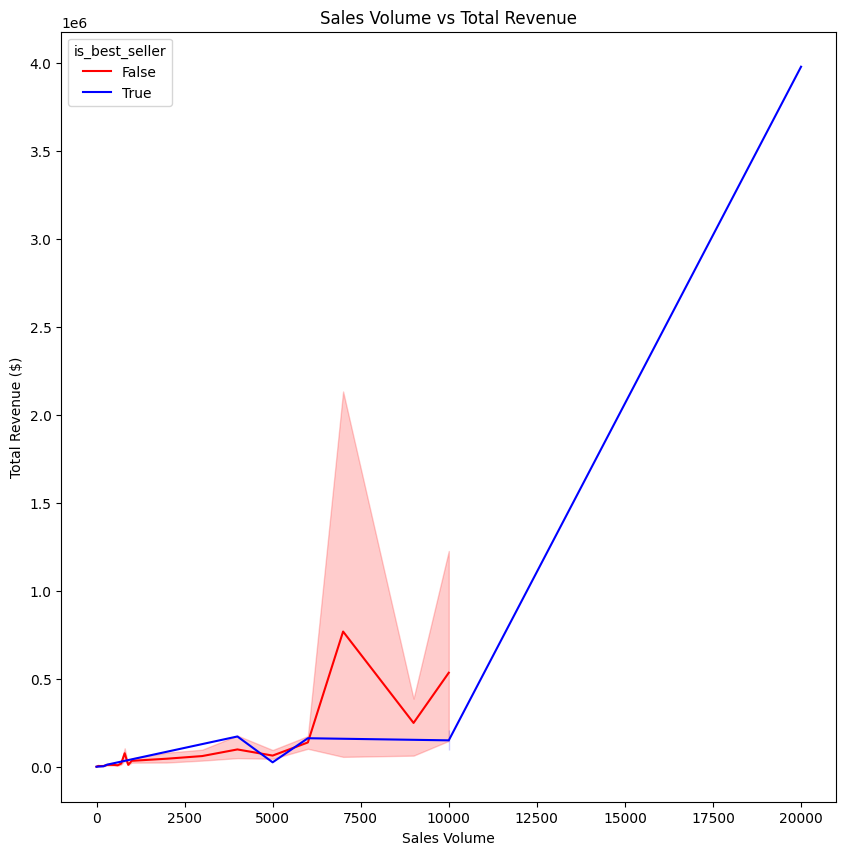

In [8]:
# Create subplots
fig, ax = plt.subplots(figsize=(10, 10))

# Define a custom palette based on a boolean column
palette = {True: "blue", False: "red"}

# Plotting
sns.lineplot(x="sales_volume_numeric", y="total_revenue", hue="is_best_seller", data=df_sorted, palette=palette, ax=ax)
ax.set_xlabel("Sales Volume")
ax.set_ylabel("Total Revenue ($)")
ax.set_title("Sales Volume vs Total Revenue")

# Define the file path to save the visualization
plt.savefig("Visualizations/Sales Volume vs Total Revenue.png")

# Display the plot
plt.show()


Upon analyzing the Total Revenue versus Sales Volume, it becomes evident that bestselling items outsell non-bestselling items by nearly twice the quantity and contribute approximately 53% more to the Total Revenue.

<Figure size 1000x800 with 0 Axes>

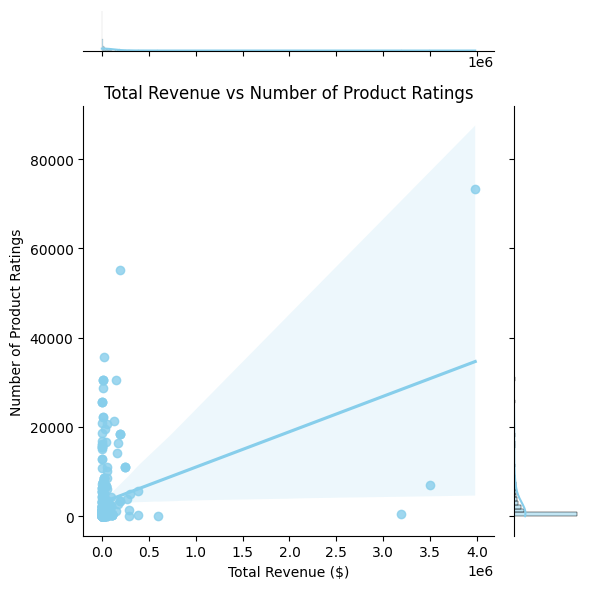

In [9]:
# Plotting
plt.figure(figsize = (10, 8))
sns.jointplot(x = "total_revenue", y = "product_num_ratings", data = df_sorted, kind = "reg", color = "skyblue")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Number of Product Ratings")
plt.title("Total Revenue vs Number of Product Ratings")
plt.tight_layout()

# Define the file path to save the visualization
plt.savefig("Visualizations/Total Revenue vs Number of Product Ratings.png")

# Display the plot
plt.show()

After evaluating the relationship between Total Revenue and Number of Product Ratings, it is evident that the quantity of ratings does not directly correlate with Total Revenue.

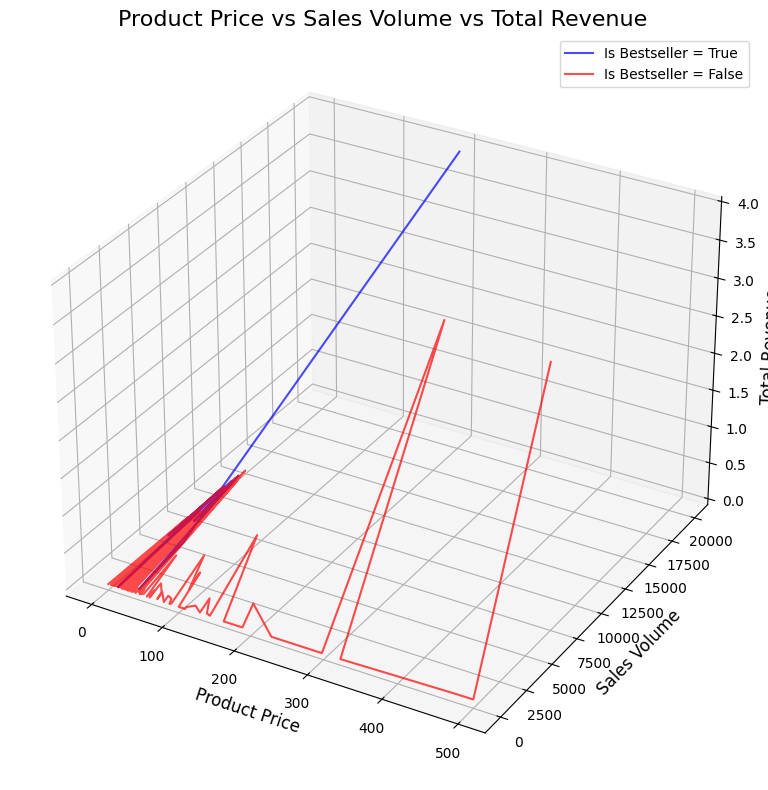

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Calculate total revenue
df['total_revenue'] = df['sales_volume_numeric'] * df['product_price']

# Create a new figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Sort the DataFrame by product_price and sales_volume_numeric
df_sorted = df_sorted.sort_values(by = ["product_price", "sales_volume_numeric"], ascending=False)

# Plotting lines for bestsellers
ax.plot(df_sorted[df_sorted["is_best_seller"] == True]["product_price"],
        df_sorted[df_sorted["is_best_seller"] == True]["sales_volume_numeric"],
        df_sorted[df_sorted["is_best_seller"] == True]["total_revenue"],
        color="blue", label="Is Bestseller = True", alpha=0.7)

# Plotting lines for non-bestsellers
ax.plot(df_sorted[df_sorted["is_best_seller"] == False]["product_price"],
        df_sorted[df_sorted["is_best_seller"] == False]["sales_volume_numeric"],
        df_sorted[df_sorted["is_best_seller"] == False]["total_revenue"],
        color="red", label="Is Bestseller = False", alpha=0.7)

# Setting titles and labels
ax.set_title("Product Price vs Sales Volume vs Total Revenue", fontsize=16)
ax.set_xlabel("Product Price", fontsize=12)
ax.set_ylabel("Sales Volume", fontsize=12)
ax.set_zlabel("Total Revenue", fontsize=12)

# Adding a legend
ax.legend()

# Define the file path to save the visualization
plt.savefig("Visualizations/Product Price vs Sales Volume vs Total Revenue.png")

# Displaying the plot
plt.tight_layout()
plt.show()


Upon analyzing the Product Price vs Sales Volume vs Total Revenue visualization, we observe that the top-selling items exhibit higher sales volume and total revenue compared to their counterparts. Notably, the best-selling component of the visualization displays a limited number of data points, indicating a potential anomaly. Furthermore, our analysis reveals that product price does not have a significant impact on sales volume, as both high-priced and low-priced items demonstrate high and low sales performance, respectively.

In [11]:
# Determine the bestselling item and the worstselling item
# Find the bestselling product
bestselling_product = df_sorted.loc[df_sorted["sales_volume_numeric"].idxmax()]

# Find the worstselling product
worstselling_product = df_sorted.loc[df_sorted["sales_volume_numeric"].idxmin()]

# Output the results
print("Bestselling Product:")
print(f"Title: {bestselling_product['product_title']}")
print(f"Sales Volume: {bestselling_product['sales_volume_numeric']}")
print(f"Total Revenue: {bestselling_product['total_revenue']}")
print(f"Is Bestseller: {bestselling_product['is_best_seller']}")
print("\nWorstselling Product:")
print(f"Title: {worstselling_product['product_title']}")
print(f"Sales Volume: {worstselling_product['sales_volume_numeric']}")
print(f"Total Revenue: {worstselling_product['total_revenue']}")
print(f"Is Bestseller: {worstselling_product['is_best_seller']}")


Bestselling Product:
Title: Meta Quest 2 — Advanced All-In-One Virtual Reality Headset — 128 GB
Sales Volume: 20000
Total Revenue: 3980000
Is Bestseller: True

Worstselling Product:
Title: Atrix - VACOMEGASLFH Omega Supreme HEPA Vacuum Electronic Fine Particle Vac - 120 Volt
Sales Volume: 0
Total Revenue: 0
Is Bestseller: False


The Meta Quest 2 VR headset, with a sales volume of 20,000 and total revenue of $3,980,000, stands as the bestselling product, further confirmed by its bestseller status. In stark contrast, the Atrix Omega Supreme HEPA Vacuum has no sales volume or revenue, and is not a bestseller, highlighting significant market challenges and lack of consumer interest. This underscores the importance of sales performance and market demand in determining a product's success.

In [12]:
from scipy.stats import ttest_rel

# Perform paired t-test for each pair of variables
columns_to_test = [
    ("product_star_rating", "product_num_ratings"),
    ("product_price", "total_revenue"),
    ("product_price", "sales_volume_numeric"),
    ("product_star_rating", "total_revenue"),
    ("product_star_rating", "sales_volume_numeric")
]

for col1, col2 in columns_to_test:
    t_statistic, p_value = ttest_rel(df_sorted[col1], df_sorted[col2])
    print(f"Paired t-test results for {col1} vs {col2}:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    print()

Paired t-test results for product_star_rating vs product_num_ratings:
T-statistic: -8.73220093424505
P-value: 9.188701970625944e-17

Paired t-test results for product_price vs total_revenue:
T-statistic: -3.3810904920109803
P-value: 0.0008003068158418058

Paired t-test results for product_price vs sales_volume_numeric:
T-statistic: -9.689857332026493
P-value: 6.637677149546227e-20

Paired t-test results for product_star_rating vs total_revenue:
T-statistic: -3.383119921459284
P-value: 0.0007945965246427226

Paired t-test results for product_star_rating vs sales_volume_numeric:
T-statistic: -9.980333692921782
P-value: 6.790968229881407e-21



product_star_rating vs product_num_ratings:
There is a significant difference between product star ratings and the number of ratings received. This suggests that products with different star ratings tend to have significantly different numbers of ratings.

product_price vs total_revenue:
There is a significant difference between product prices and total revenue generated. It implies that products with different prices generate significantly different total revenues.

product_price vs sales_volume_numeric:
There is a significant difference between product prices and sales volume. It means that products with different prices tend to have significantly different sales volumes.

product_star_rating vs total_revenue:
There is a significant difference between product star ratings and total revenue generated. This suggests that products with different star ratings generate significantly different total revenues.

product_star_rating vs sales_volume_numeric:
There is a significant difference between product star ratings and sales volume. It implies that products with different star ratings tend to have significantly different sales volumes.

# Analysis
Total Revenue vs. Sales Volume:
Bestselling items significantly outsell non-bestselling items by almost twice the quantity and contribute approximately 53% more to the Total Revenue. This indicates that being a bestseller strongly correlates with higher sales volume and revenue generation.

Total Revenue vs. Number of Product Ratings:
There isn't a direct correlation between the quantity of ratings and Total Revenue. This suggests that the number of ratings alone may not be indicative of a product's revenue-generating potential.

Product Price vs. Sales Volume vs. Total Revenue:
High sales volume and total revenue are observed for top-selling items compared to others. However, there's a notable anomaly in the best-selling category with a limited number of data points. Interestingly, product price doesn't seem to significantly impact sales volume, as both high and low-priced items demonstrate varying sales performance.

Bestselling and Worstselling Products:
The Meta Quest 2 VR headset emerges as the bestselling product with a sales volume of 20,000 and total revenue of $3,980,000, further confirmed by its bestseller status. Conversely, the Atrix Omega Supreme HEPA Vacuum has no sales volume or revenue, indicating significant market challenges and lack of consumer interest. This highlights the critical role of sales performance and market demand in a product's success.

Paired T-Test Results:
There are significant differences observed between product star ratings and the number of ratings received, product prices and total revenue generated, product prices and sales volume, product star ratings and total revenue generated, and product star ratings and sales volume. These differences indicate the influence of these factors on each other and can provide valuable insights for product analysis and strategy.